In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings(action="ignore")

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [2]:
data = pd.read_csv("/kaggle/input/sf-salaries/Salaries.csv", low_memory=False)

<h1>Display Top 10 Rows of The Dataset

In [3]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<h1>Check Last 10 Rows of The Dataset

In [4]:
data.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


<h1>Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


<h2>Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


<h1>Check Null Values In The Dataset


In [7]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

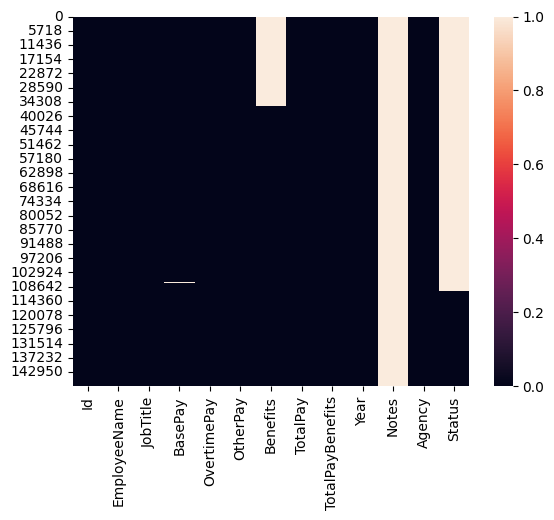

In [8]:
sns.heatmap(data.isnull());

<h1>Drop ID, Notes, Agency, and Status Columns


In [9]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [10]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [11]:
data.drop(columns=["Id", "Notes", "Agency", "Status"], inplace=True)

In [12]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


<h1>Get Overall Statistics About The Dataframe


In [13]:

data.describe(include="all")

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654,148654,148049,148654,148654,112495,148654.000000,148654.000000,148654.000000
unique,110811,2159,109724,66162,84243,98647,NaN,NaN,NaN
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN
freq,13,7036,872,57868,30068,1024,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643
std,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538
min,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000


<h1>Find Occurrence of The Employee Names  (Top 5)


In [14]:
data.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

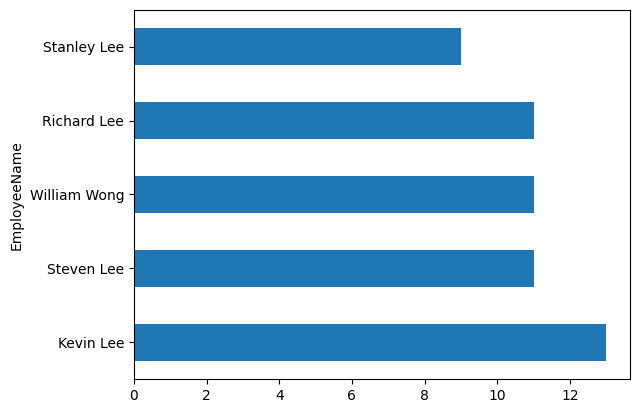

In [15]:
data.EmployeeName.value_counts().sort_values(ascending=False).head().plot.barh();

<h1>Find The Number of Unique Job Titles

In [16]:
data["JobTitle"].nunique()

2159

<h1>Total Number of Job Titles Contain Captain


In [17]:
data[data.JobTitle.str.contains("captain", case=False)].shape[0]

552

<h1>Display All the Employee Names From Fire Department

In [18]:
data.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [19]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


In [20]:
data[data.JobTitle.str.contains("fire department", case=False)].EmployeeName

4              PATRICK GARDNER
6                    ALSON LEE
8               MICHAEL MORRIS
9           JOANNE HAYES-WHITE
10               ARTHUR KENNEY
                  ...         
32623             JAMES BARDEN
36162       Joanne Hayes-White
72926     Joanne M Hayes-White
102303          Robert E Evans
110535    Joanne M Hayes-White
Name: EmployeeName, Length: 226, dtype: object

<h1>Find Minimum, Maximum, and Average BasePay

In [21]:
data.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

data cleaning

In [22]:
data = data[data["BasePay"] != "Not Provided"]

In [23]:
data["BasePay"] = data["BasePay"].astype("float")

In [24]:
data["BasePay"] = data["BasePay"].fillna(value=data["BasePay"].mean())

In [25]:
data.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [26]:
print("Maximum Base Pay :", data["BasePay"].max())
print("Minimum Base Pay :", data["BasePay"].min())
print("Average Base Pay :", data["BasePay"].mean())

Maximum Base Pay : 319275.01
Minimum Base Pay : -166.01
Average Base Pay : 66325.44884048769


<h1>Replace 'Not Provided' in EmployeeName' Column to NaN

In [27]:
data["EmployeeName"] = data["EmployeeName"].replace({"Not Provided": np.nan})

<h1>Drop The Rows Having 5 Missing Values

In [28]:
data.dropna(thresh=data.shape[1]-5+1, inplace=True)

In [29]:
data.shape

(148650, 9)

<h1>Find Job Title of ALBERT PARDINI

In [30]:
data.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011


In [31]:
data[data["EmployeeName"] == "ALBERT PARDINI"]["JobTitle"]

2    CAPTAIN III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

<h1>How Much ALBERT PARDINI Make (Include Benefits)?

In [32]:
data.isnull().sum()

EmployeeName            2
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [33]:
data.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [34]:
data["Benefits"] = data["Benefits"].astype("float")

In [35]:
data["Benefits"] = data["Benefits"].fillna(value=data["Benefits"].mean())

In [36]:
data[data["EmployeeName"] == "ALBERT PARDINI"]["Benefits"]

2    25007.893151
Name: Benefits, dtype: float64

<h1>Display Name of The Person Having The Highest BasePay

In [37]:
data[data["BasePay"].max() == data["BasePay"]]["EmployeeName"]

72925    Gregory P Suhr
Name: EmployeeName, dtype: object

<h1>Find Average BasePay of All Employee Per Year 


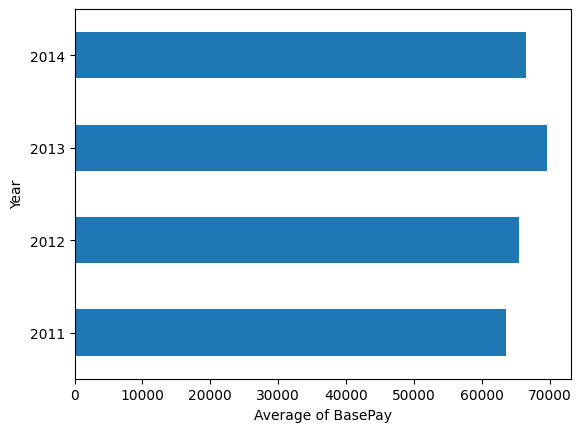

In [38]:
data.groupby(by=["Year"])["BasePay"].mean().plot.barh()
plt.xlabel("Average of BasePay")
plt.show()

<h1>Find Average BasePay of All Employee Per JobTitle 


In [39]:
data.groupby("JobTitle")["BasePay"].mean()

JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2158, dtype: float64

<h1>Find Average BasePay of Employee Having Job Title ACCOUNTANT  


In [40]:
data[data["JobTitle"] == "ACCOUNTANT"]["BasePay"].mean()

46643.172

<h1>Find Top 5 Most Common Jobs

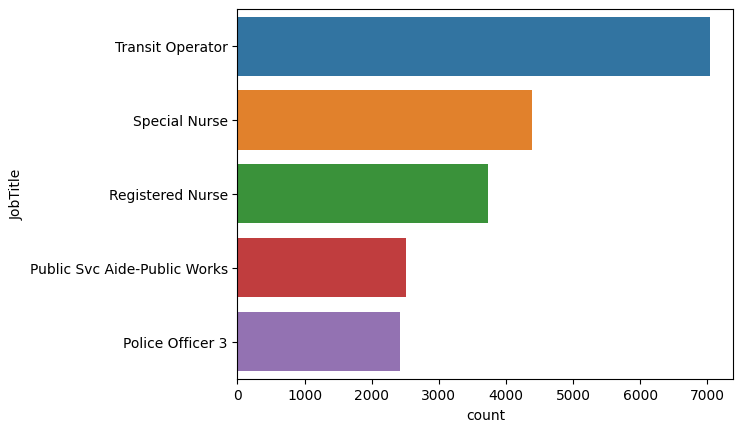

In [41]:
data_ = data["JobTitle"].value_counts().sort_values(ascending=False).head().to_frame()
sns.barplot(data=data_, x="count", y=data_.index)
plt.show()